<a href="https://colab.research.google.com/github/jithinprakashk/tests/blob/main/assignment_data_analyst_LP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dear data enthusiast,

We're happy that you have reached to this notebook. We expect you to spend 3-4 hours for solving these problems. This is a shared notebook so please keep in mind that you have to **Crtl+S** save your code. Hope you will enjoy finding interesting facts in the data.
  
Good luck!



In [1]:
# please write down your first and last name on the following line
# Jithin Prakash K 

# 0- Quiz setup
Execute the below 2 cells of code before starting the quiz.

### 0-1 Install Dependencies
This installation will take around 2 minutes, after you see the following error message, you can continue run the next cell `0-2 Initiate the Quiz`.   
<img src='https://drive.google.com/uc?id=1T61Fx1xfKoh2ODuJ5t76e1N7lrqlTRwy' alt="Your session crashed for an unknown reason. " width="400" >. 
  
**NOTE**: Intentionally crashing session to use the newly installed library.

In [ ]:
#@title
from packaging import version
import sqlite3

if version.parse(sqlite3.sqlite_version) < version.parse('3.33.0'):
  print('NOTE: Intentionally crashing session to use the newly installed library.\n')
  !curl https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release | tar xz
  %cd sqlite/
  !./configure
  !make sqlite3.c
  %cd /content
  !npx degit coleifer/pysqlite3 -f
  !cp sqlite/sqlite3.[ch] .
  !python setup.py build_static build
  !cp build/lib.linux-x86_64-3.7/pysqlite3/_sqlite3.cpython-37m-x86_64-linux-gnu.so \
    /usr/lib/python3.7/lib-dynload/

  import os
  os._exit(0)

NOTE: Intentionally crashing session to use the newly installed library.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.9M  100 10.9M    0     0  9153k      0  0:00:01  0:00:01 --:--:-- 9153k
/content/sqlite
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for a sed that does not truncate output... /bin/sed
checking for grep that handles long lines and -e... /bin/grep
checking for egrep... /bin/grep -E
checking fo

### 0-2 Initiate the Quiz

In [1]:
#@title
from packaging import version
import sqlite3

from datetime import datetime
import numpy as np
import pandas as pd
from sqlalchemy import (
    create_engine,
    Column, DateTime, Integer, Numeric, String, Sequence, NVARCHAR
)
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import orm 

Base = declarative_base()
N_ORDER = 300
START_DATE = '2018-03-01'
END_DATE = '2018-03-31'
N_OFFER = 10


class Order(Base):
  __tablename__ = 'orders'
  order_id = Column(Integer, Sequence('order_id_seq'), primary_key=True)
  article_id = Column(Numeric())
  customer_id = Column(Numeric())
  order_time = Column(DateTime())
  order_quantity = Column(Numeric())


class Offer(Base):
  __tablename__ = 'offers'
  offer_id = Column(Integer, Sequence('offer_id_seq'), primary_key=True)
  supplier_id = Column(Numeric())
  available_stock_quantity = Column(Numeric())
  material_type = Column(NVARCHAR())
  material_price_eur = Column(Numeric())


class Quiz():
  def __init__(self):
    self.engine = create_engine('sqlite:///:memory:', echo=False)
    self.conn = self.engine.connect()
    Session = orm.sessionmaker(bind=self.engine)
    self.session = Session()
    self.__insert_data_to_db()    

  def get_results(self, query):
    query = query.statement if isinstance(query, orm.query.Query) else query
    return pd.read_sql(query, self.conn)

  def __insert_data_to_db(self):
    Base.metadata.create_all(self.engine)

    data = self._generate_order_dateset()
    for idx, row in data.iterrows():
      obj = Order(
        article_id=row['article_id'],
        customer_id=row['customer_id'],
        order_time=row['order_time'],
        order_quantity=row['order_quantity'],
      )
      self.session.add(obj)
      self.session.commit()

    data = self._generate_offer_dataset()
    for idx, row in data.iterrows():
      obj = Offer(
        supplier_id=row['supplier_id'],
        available_stock_quantity=row['available_stock_quantity'],
        material_type=row['material_type'],
        material_price_eur=row['material_price_eur'],
      )
      self.session.add(obj)
      self.session.commit()  

  @staticmethod
  def _generate_order_dateset(
    data_size=N_ORDER,
    start_date=START_DATE,
    end_date=END_DATE,
  ):
    np.random.seed(seed=2)
    article_id = np.random.randint(111, 116, data_size)

    np.random.seed(seed=0)
    customer_id = np.random.randint(1222, 1330, data_size)
    
    def _random_dates(start, end, n=10):
      np.random.seed(seed=0)
      start = pd.to_datetime(start)
      end = pd.to_datetime(end)
      start_u = start.value//10**9
      end_u = end.value//10**9
      return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')
    order_time = _random_dates(start_date, end_date, data_size)
    order_time = sorted(order_time)

    np.random.seed(seed=0)
    order_quantity = np.random.randint(1,4, data_size)

    data = pd.DataFrame({
      'article_id': article_id, 
      'customer_id': customer_id,
      'order_time': order_time,
      'order_quantity': order_quantity,
    })

    return data
  
  @staticmethod
  def _generate_offer_dataset(n=N_OFFER):
    supplier_id = np.linspace(1, n, num=n)
    available_stock_quantity = np.repeat(1, n)
    material_type = [
      'ceramic','ceramic','ceramic','ceramic','wood','ceramic','wood','wood',
      'wood','wood'
    ]
    material_price_eur = [
      1000, 1500, 2500, 5000, 6000, 7000, 8000, 11000, 12000, 15000
    ]
    
    data = pd.DataFrame({
      'supplier_id': supplier_id, 
      'available_stock_quantity':available_stock_quantity,
      'material_type': material_type,
      'material_price_eur': material_price_eur,
    })

    return data


if version.parse(sqlite3.sqlite_version) < version.parse('3.33.0'):
  print('sqlite3 is not updated, try to update or contact us.')
else: 
  quiz = Quiz()

# 1- SQL quiz
Write down your query to get the expected result.   
**Note**: If you have problem running the sql below, considere using *sqlite* syntax.

## 1-1 Best Performing Day(s) per Article


Table `orders` :  
The table shows the orders of the articles in an online store. Each row is a transaction of a customer order.
  
Column Name | Datatype 
--- | --- 
order_id | Integer (primary_key)
article_id | Numeric 
customer_id | Numeric 
order_time | DateTime
order_quantity | Numeric 

To understand when is the best time to sell the article, we want to create a report that shows the day that had the highest order amount for each article. Check the example for clarity.

Example from the `orders` table:  

In [2]:
#@title
quiz.get_results(" select * from orders limit 5")

,order_id,article_id,customer_id,order_time,order_quantity
0,1,111,1266,2018-03-01 03:43:49.000000,1
1,2,111,1269,2018-03-01 05:45:37.000000,2
2,3,114,1286,2018-03-01 06:52:57.000000,1
3,4,113,1289,2018-03-01 10:55:35.000000,2
4,5,114,1289,2018-03-01 12:08:43.000000,2



Expacted result table:  
Your SQL query should return the following rows.

article_id | order_date | order_quantity
--- | ---  | ---
111 | 2018-03-05 | 8
111 | 2018-03-26 | 8
112 | 2018-03-11 | 10
113 | 2018-03-29 | 18
114 | 2018-03-29 | 14
115 | 2018-03-21 | 14

In [3]:
# write the query to get your result
query = """
    select
        article_id,
        order_date,
        tot_qty as order_qty
    from (
        select
            *,
            rank() over (partition by article_id order by tot_qty desc) as rank
        from (
            select
                article_id,
                date(order_time) as order_date,
                sum(order_quantity) as tot_qty 
            from
                orders
            group by 1,2
        )
    )
    where rank=1
"""
quiz.get_results(query)

,article_id,order_date,order_qty
0,111,2018-03-05,8
1,111,2018-03-26,8
2,112,2018-03-11,10
3,113,2018-03-29,18
4,114,2018-03-29,14
5,115,2018-03-21,14


## 1-2 Budget Allocation
Assume that you need to order wood and ceramic materials for your production 
and you had following offers from different suppliers.

Table `offers`

Column Name | Datatype 
--- | --- 
offer_id | Integer (primary_key)
supplier_id | Numeric 
available_stock_quantity | Numeric
material_type | NVARCHAR 
material_price_eur | Numeric 

Your strategy is first buy as much as wood with your budget and if there is still any available budget use it to buy as much as ceramic. Your budget is limited with 30.000 Euro. 

To make the things easier assume that this year **all suppliers can offer only 1 item as per listed in the table**, so you will not order more than 1 from 1 offer. Write an sql query and the result should show how would you distribute your budget. 

The full offers:


In [4]:
quiz.get_results(" select * from orders offers limit 10")

,order_id,article_id,customer_id,order_time,order_quantity
0,1,111,1266,2018-03-01 03:43:49.000000,1
1,2,111,1269,2018-03-01 05:45:37.000000,2
2,3,114,1286,2018-03-01 06:52:57.000000,1
3,4,113,1289,2018-03-01 10:55:35.000000,2
4,5,114,1289,2018-03-01 12:08:43.000000,2
5,6,111,1325,2018-03-01 13:18:03.000000,3
6,7,113,1231,2018-03-01 20:37:33.000000,1
7,8,112,1305,2018-03-01 22:58:47.000000,3
8,9,114,1243,2018-03-01 23:55:07.000000,1
9,10,113,1258,2018-03-02 01:29:17.000000,1


In this question, we showed you the result table would look the same as below

ordered_wood_quantity | ordered_ceramic_quantity | 
--- | --- 
3 | 3



In [5]:
# write the query to get your result
query = """
    with woods as (
        select 
            count(*) as qty,
            sum(price) as wood_price
        from (
            select 
                material_price_eur as price,
                sum(material_price_eur) over (order by material_price_eur) as cum_sum
            from
                offers
            where
                material_type='wood'
        )
        where cum_sum<=30000
    ),
    ceramics as (
        select 
            count(*) as qty,
            sum(price)
        from (
            select 
                material_price_eur as price,
                sum(material_price_eur) over (order by material_price_eur) as cum_sum
            from
                offers
            where
                material_type='ceramic'
        )
        where cum_sum<=(30000 - (select wood_price from woods))
    )


    select
        (select qty from woods) as ordered_wood_quantity,
        (select qty from ceramics) as ordered_ceramic_quantity
        
   
"""
quiz.get_results(query)

,ordered_wood_quantity,ordered_ceramic_quantity
0,3,3


# 2 - Data exploration and analysis 
This dataset is a toy dataset, so the data is clean and just ready for you to express your ideas. Please use your visualization and statistics skill to demonstrate your thought process and reasoning. Tell us your conclusion from the data with clear statement. Now ready to explore the data and convince us.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

data = load_boston()
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['target'] = data['target']

print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 2-1 The dependency of the house price and the number of rooms
* **How would you explain the dependencies of house price and number of rooms?**


In [2]:
# Printing the TOP 5 Rows of the dataframe
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Checking for Null values
df.isnull().mean()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
target     0.0
dtype: float64

- No null values.

In [7]:
# Correlation between Rooms and the Target (Price)
'Correlation between number of rooms and prince is : {}'.format(df.RM.corr(df.target).round(4))

'Correlation between number of rooms and prince is : 0.6954'

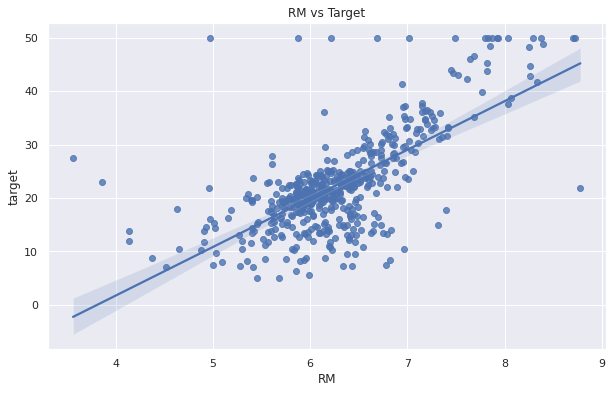

In [8]:
# Scatter plot between Rooms and the Target Price
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10,6))
sns.set_theme(color_codes=True)
ax = sns.regplot(x='RM', y='target', data=df)
plt.title('RM vs Target')
plt.show()

- The plot shows that there is a positive linear correlation between the `average number of rooms per dwelling` and the `target` price

* **Can you come up a hypothesis and test it?**

We can consider the target and the number of rooms have a linear relationship in the form of 

$\hat{y}=β₀+β₁x$  

Where
>  y is the target price   
> x is the numner of rooms.



Now, if we consider the hypthesis test then,

$H₀ : β₁ = 0$     
$H_{a} : β₁ ≠ 0  $ 

    Null hypothesis      : There is no relation between the price ($y$) and number of rooms ($x$)  
    Alternate hypothesis : There is some relation between the price ($y$) and number of rooms ($x$)



In [9]:
# Calculating the p-value ad the coefficients using statsmodels

import statsmodels.api as sm

# Defining the target and independant variable (Number of rooms)
y = df.target
x = df.RM

# Adding a constant term
x_sm = sm.add_constant(x)

# Fitting the model
lm = sm.OLS(y, x_sm).fit()

# Model Summary
print(lm.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           2.49e-74
Time:                        16:41:51   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

- From the above analysis, it is found that the $p-value$ for both constant and the number of rooms is $0.000$.

- i.e the $p-value < 0.05$ and thus we fail to reject the null hypothesis ($H_{o}$). 
- This means the $β₁$ is not $0$ ( The value is $9.1021$) i.e. there is a poitive relation between number of rooms and price. With every one unit increment in the number of rooms, the price increases bye 9.10 units



* **Is there some exceptions of the dependency you found? How would you explain it?**

In [10]:
# Residuals
df['resid'] = abs(lm.resid)
head = df.sort_values(by=['resid'], ascending=[False]).head(8)

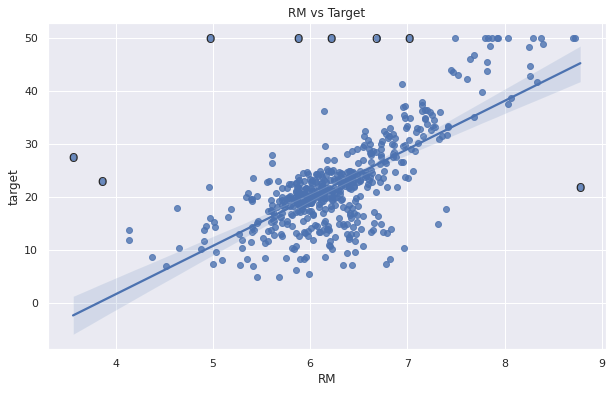

In [11]:
# Plot regplot
plt.figure(figsize=(10,6))
sns.set_theme(color_codes=True)
ax = sns.regplot(x='RM', y='target', data=df)
plt.title('RM vs Target')

# Annotate
for row in head.iterrows():
    plt.gca().annotate('O', xy=(row[1]["RM"], row[1]["target"]), xytext=(-5,-5), textcoords ="offset points")
plt.show()

- From the above plot, it is visible that there are properties which does not completely align with the regression line formulated.
- Our regression line says that as the number of rooms are less, the target price also would be less and when the number of rooms increase, the price also should increase.
- However, there are outliers to the above statement. As marked, there are properties with number of rooms less than 4 and with a target price between \$20-30K. Also there are outliers with 5 -7 rooms with \$50k price range.
- Same applies at the high number of rooms as well, There is a property with nearly 9 rooms and priced around $22k. These properies are the exceptions from the derived dependency. The  properies are bordered with an outline.

## 2-2 The interaction effects 
Which attributes have the interaction effects? How does it affect the house price?

In [12]:
# Removing the resid feature and printing the head/top 5 records
df.pop('resid')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


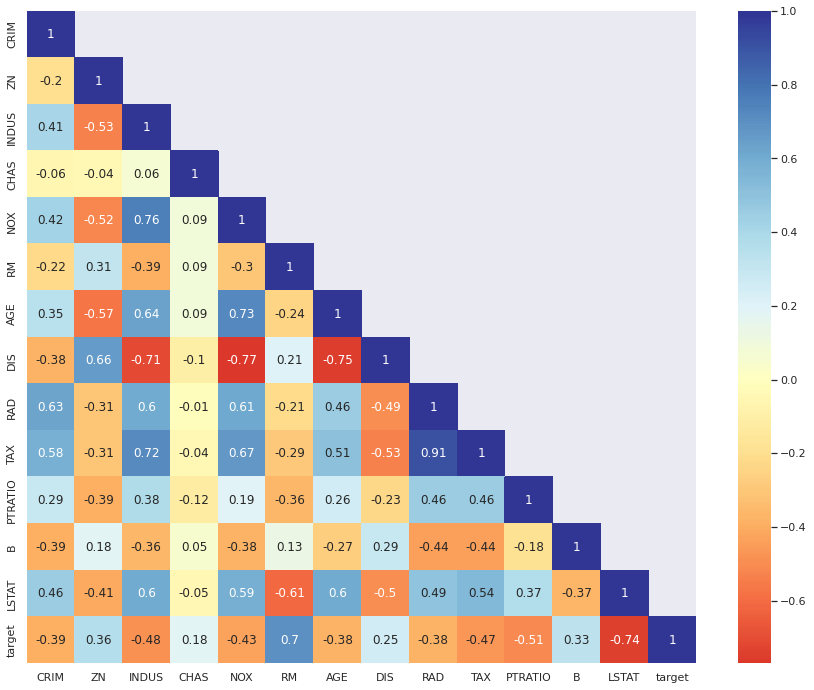

In [13]:
# Correlation between the features plotted as Heatmap
plt.figure(figsize=(15,12))
mask_ut=np.triu(np.ones(df.corr().shape, bool),k=1)
sns.heatmap(df.corr().round(2),cmap='RdYlBu', annot=True, mask=mask_ut, center=0)
plt.show()

In [14]:
# Features with high correlation

corr_df = df.corr().unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature1','Feature2','Correlation']
corr_df['dupe_helper'] = corr_df[['Feature1','Feature2']].apply(lambda x: '-'.join(sorted(x)), axis=1)
corr_df = corr_df[(corr_df.Feature1!=corr_df.Feature2) & (corr_df.Correlation.abs()>0.65)].drop_duplicates(subset=['dupe_helper']).reset_index(drop=True)
corr_df.pop('dupe_helper')
corr_df

,Feature1,Feature2,Correlation
0,TAX,RAD,0.910228
1,INDUS,NOX,0.763651
2,NOX,AGE,0.731470
3,TAX,INDUS,0.720760
4,target,RM,0.695360
5,TAX,NOX,0.668023
6,DIS,ZN,0.664408
7,DIS,INDUS,-0.708027
8,target,LSTAT,-0.737663
9,AGE,DIS,-0.747881


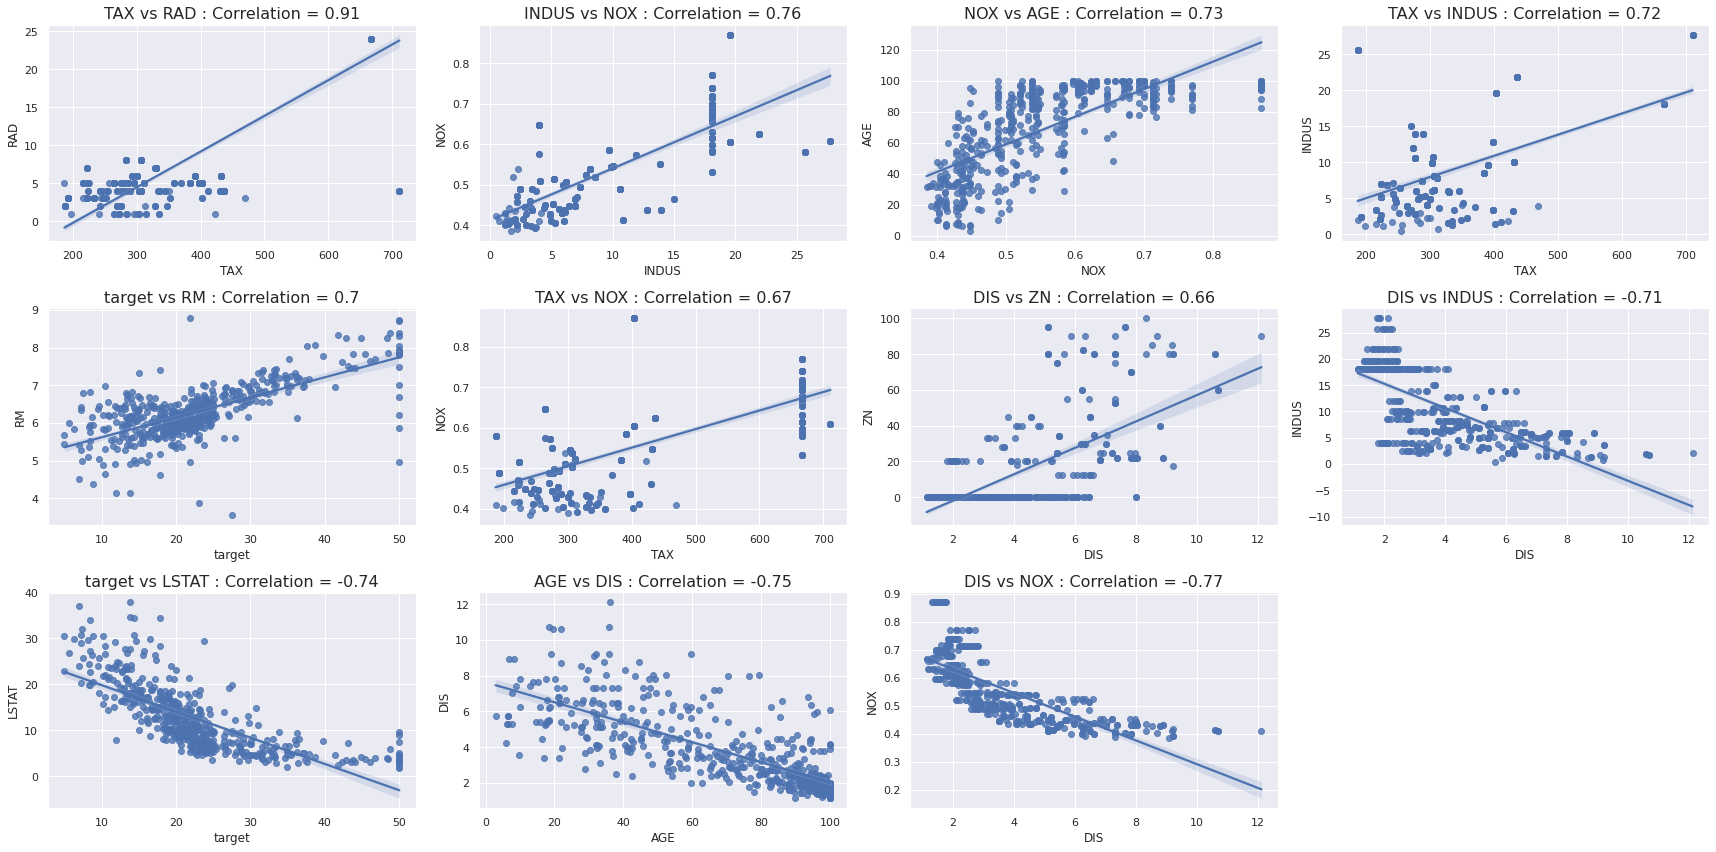

In [82]:
# Regplot between the highly correlated features for better understanding of outliers.

plt.figure(figsize=(24,12))
for n,f1,f2 in zip(corr_df.index, corr_df.Feature1, corr_df.Feature2):
    plt.subplot(3,4,n+1)
    sns.regplot(x=f1,y=f2, data=df)
    plt.title(f1+' vs '+f2+' : Correlation = '+str(df[f1].corr(df[f2]).round(2)),fontsize=16)
plt.tight_layout()
plt.show()

**To find the interaction effect, we are going to calculate the cross validation $R^{2}$ score of the base model (with all features) and comparing it with the feature engineered model (interaction effect of variables) and see if the $R^{2}$ score is improved for the new model with the added feature. Feature engineering is done by multiplying the two features from base model.**

In [41]:
# Importing the Libraries for Linear regession, Cross Validation 
from sklearn.linear_model       import LinearRegression
from sklearn.model_selection    import cross_val_score
from sklearn.model_selection    import KFold

In [49]:
# Defining X independant variable and y dependant variable
X=df.drop(columns=['target'])
y=df.target
base_features = X.columns

print('Shape of X :{0}\nShape of Y :{1}'.format(X.shape,y.shape))

Shape of X :(506, 13)
Shape of Y :(506,)


In [68]:
# Initializing the Linear regresssion
regression = LinearRegression(normalize=True)
# Cross validation Folds (8 Folds used i.e ~60 records per fold)
crossvalidation = KFold(n_splits=8, shuffle=True, random_state=42)

In [69]:
# Using cross validation, calculating the base model score
base_model_score = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation, n_jobs=1)).round(4)
print('Baseline R2 =', base_model_score)

Baseline R2 = 0.7169


In [70]:
# Finding the model R2 score from cross-validation using the new features derived from base  model
interactions = list()
for feature_A in base_features:
 for feature_B in base_features:
  if feature_A > feature_B:
   X['interaction'] = X[feature_A] * X[feature_B]
   score = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation, n_jobs=1))
   if score > base_model_score:
    interactions.append((feature_A, feature_B, round(score,3)))

print('Total interaction found =',len(interactions))

Total interaction found = 34


**Top 5 combination of Attributes have the interaction effects are**



In [71]:
print('Top 5 Interactions found :')
top5_interaction_df = pd.DataFrame(sorted(interactions, key=lambda x :x[2],reverse=True)[:5], 
                                   columns = ['Feature1','Feature2','R2_Score'])
top5_interaction_df

Top 5 Interactions found :


,Feature1,Feature2,R2_Score
0,RM,LSTAT,0.781
1,TAX,RM,0.770
2,RM,RAD,0.764
3,RM,PTRATIO,0.759
4,RM,INDUS,0.753


**The effect of interaction attributes on the house price is as following**

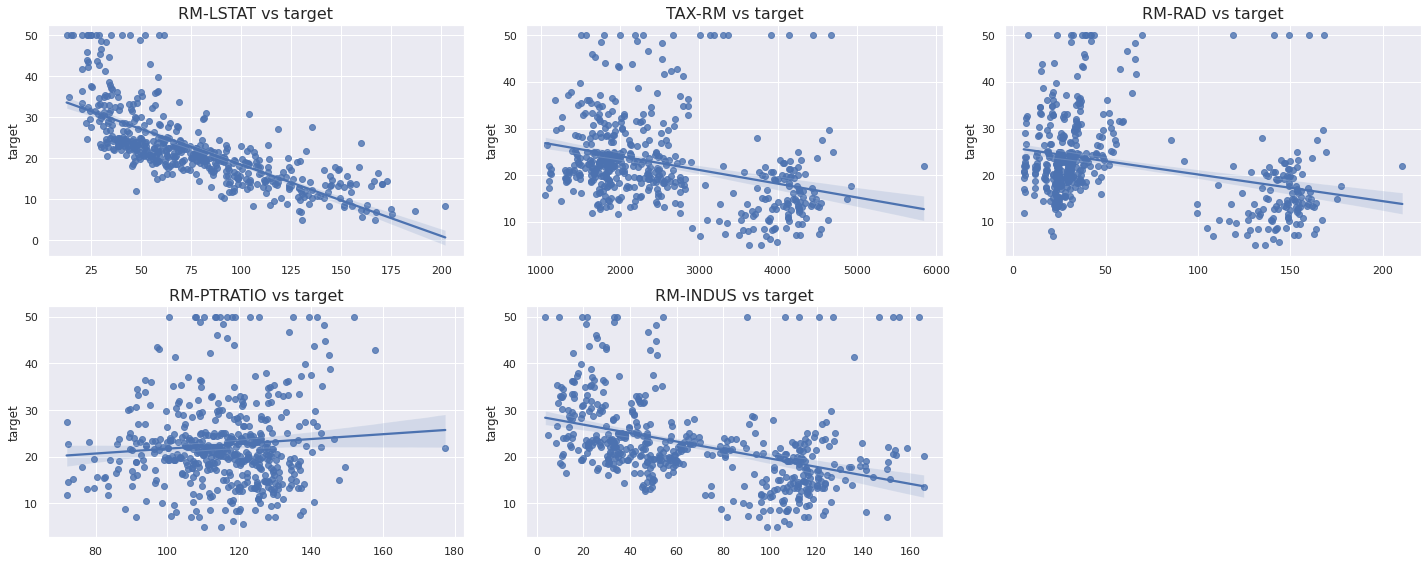

In [83]:
# Regplot for the interaction attributes against target price
plt.figure(figsize=(20,8))
for n,f1,f2 in zip(top5_interaction_df.index, top5_interaction_df.Feature1,top5_interaction_df.Feature2):
    plt.subplot(2,3,n+1)
    sns.regplot(x=df[f1]*df[f2],y=df.target)
    plt.title(f1+'-'+f2+' vs target', fontsize=16)
plt.tight_layout()
plt.show()

- Fromt the above chart it is evident that the $RM×LSTAT$ shows a negative correlation with price, i.e. price decreasing steadily with increase in the $RM × LSTAT$ value
- $RM×PTRATIO$ doesnt show any high correlation with target however the crossvalidation is giving better results. Most of the data points are clustered between 100-140 value for the target price \\$10k to \\$30k 
- For $RM×TAX, RM×RAD $ and $RM×INDUS$ the correlation is negative with target, i.e. when the value of the feature goes high, the target price decreases. It is also evident that there are two separate clusters for high valued and low valued properties.
